In [1]:
# import keras
# from keras.datasets import cifar10
# from keras.models import Model, Sequential
# from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
# from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.layers import Concatenate
# from keras.optimizers import Adam
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf

In [3]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 10
l = 40
num_filter = 12
compression = 0.5
dropout_rate = 0.2

In [4]:
# Load CIFAR10 Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
img_height, img_width, channel = X_train.shape[1],X_train.shape[2],X_train.shape[3]

# convert to one hot encoing 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes) 

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
# Dense Block
def denseblock(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    temp = input
    for _ in range(l): 
        BatchNorm = layers.BatchNormalization()(temp)
        relu = layers.Activation('relu')(BatchNorm)
        Conv2D_3_3 = layers.Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        if dropout_rate>0:
            Conv2D_3_3 = layers.Dropout(dropout_rate)(Conv2D_3_3)
        concat = layers.Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

## transition Blosck
def transition(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = layers.Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(relu)
    if dropout_rate>0:
         Conv2D_BottleNeck = layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = layers.AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    return avg

#output layer
def output_layer(input):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    AvgPooling = layers.AveragePooling2D(pool_size=(2,2))(relu)
    flat = layers.Flatten()(AvgPooling)
    output = layers.Dense(num_classes, activation='softmax')(flat)
    return output

In [8]:
num_filter = 12
dropout_rate = 0.2
l = 12
input = layers.Input(shape=(img_height, img_width, channel,))
First_Conv2D = layers.Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input)

First_Block = denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = transition(First_Block, num_filter, dropout_rate)

Second_Block = denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = transition(Second_Block, num_filter, dropout_rate)

Third_Block = denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = transition(Third_Block, num_filter, dropout_rate)

Last_Block = denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Last_Block)

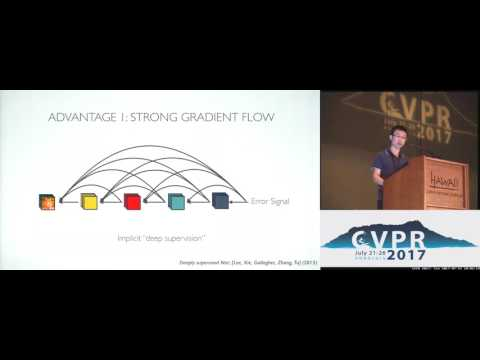

In [9]:
#https://arxiv.org/pdf/1608.06993.pdf
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo(id='-W6y8xnd--U', width=600)

In [10]:
model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 12)   324         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 12)   48          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 12)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
print(len(model.layers))

262


In [12]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
# model.fit(X_train, y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1, 
#                     validation_data=(X_test, y_test))

### CNN on CIFR Assignment:

1.  Please visit this link to access the state-of-art DenseNet code for reference - DenseNet - cifar10 notebook link
2.  You need to create a copy of this and "retrain" this model to achieve 90+ test accuracy. 
3.  You cannot use DropOut layers.
4.  You MUST use Image Augmentation Techniques.
5.  You cannot use an already trained model as a beginning points, you have to initilize as your own
6.  You cannot run the program for more than 300 Epochs, and it should be clear from your log, that you have only used 300 Epochs
7.  You cannot use test images for training the model.
8.  You cannot change the general architecture of DenseNet (which means you must use Dense Block, Transition and Output blocks as mentioned in the code)
9.  You are free to change Convolution types (e.g. from 3x3 normal convolution to Depthwise Separable, etc)
10. You cannot have more than 1 Million parameters in total
11. You are free to move the code from Keras to Tensorflow, Pytorch, MXNET etc. 
12. You can use any optimization algorithm you need. 
13. You can checkpoint your model and retrain the model from that checkpoint so that no need of training the model from first if you lost at any epoch while training. You can directly load that model and Train from that epoch. 

In [1]:
# import keras
# from keras.datasets import cifar10
# from keras.models import Model, Sequential
# from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
# from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.layers import Concatenate
# from keras.optimizers import Adam
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import numpy as np

In [2]:
import tensorflow as tf

In [ ]:
# Hyperparameters
compression = 1
num_filter = 17
dropout_rate = 0
l = 13
num_classes = 10

# batch_size = 128
# num_classes = 10
# epochs = 10
# l = 40
# num_filter = 12
# compression = 0.5
# dropout_rate = 0.2

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
img_height, img_width, channel = X_train.shape[1],X_train.shape[2],X_train.shape[3]


170500096/170498071 [==============================] - 11s 0us/step


In [4]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [5]:
print(X_test.shape)
print(y_test.shape)


(10000, 32, 32, 3)
(10000, 1)


In [6]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes) #one hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes)  # one hot encoding


In [9]:
mean_X_tr = np.mean(X_train, axis=(0,1,2))
mean_X_tr

array([125.30691805, 122.95039414, 113.86538318])

In [10]:
std_X_tr = np.std(X_train, axis=(0,1,2))
std_X_tr

array([62.99321928, 62.08870764, 66.70489964])

In [11]:
X_train = (X_train - mean_X_tr) / std_X_tr #normalization
X_test = (X_test - mean_X_tr) / std_X_tr

In [12]:
#data augmentation
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True) #image generator
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 
train_generator=train_datagen.flow(X_train,y_train,batch_size=150)
test_generator=test_datagen.flow(X_test,y_test,batch_size=150)

In [14]:
#https://www.google.com/search?q=callback+function&rlz=1C1RLNS_enIN923IN923&oq=callback&aqs=chrome.1.69i57j0i433l2j0l2j69i60j69i61l2.5990j0j7&sourceid=chrome&ie=UTF-8
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.90):
      print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.90*100))
      self.model.stop_training = True

val_acc_callback=myCallback()

In [16]:
filepath='/content/best_model_h5'

In [17]:
#https://www.tensorflow.org/guide/keras/train_and_evaluate
model_best=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True,save_weights_only=True, mode='auto', save_freq='epoch')

In [18]:
#f= no of filter
#d=no of dense block
#t=no of transition blk

def no_of_connection(l):
  a=(l * (l+ 1))/2 # each layer has connection to its preceding and subsequent layer directly
  return a

def total_parametres(l, f,d,t):
  input= 3 * 3 * 3 * f
  dense= d * ((f * 3 * 3 * f *no_of_connection(l)) + ( 4 * f * no_of_connection(l)))
  para=t * ( (1 * 1 * f * f* ((l +1)) + 4 * f * (l+1)))
  out=((2 * 2 * f * (l+1) * 10) + 10) + (4 * f * (l+1))
  return input,dense,para,out

In [19]:
sum(total_parametres(13,17,4,3))

997451.0

In [21]:
# Dense Block
def denseblock(input, num_filter = 17, dropout_rate = 0.2):
    global compression
    temp = input
    for _ in range(l): 
        BatchNorm = layers.BatchNormalization()(temp)
        relu = layers.Activation('relu')(BatchNorm)
        Conv2D_3_3 = layers.Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        if dropout_rate>0:
            Conv2D_3_3 = layers.Dropout(dropout_rate)(Conv2D_3_3)
        concat = layers.Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

## transition Blosck
def transition(input, num_filter = 17, dropout_rate = 0.2):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = layers.Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(relu)
    if dropout_rate>0:
         Conv2D_BottleNeck = layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = layers.AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    return avg

#output layer
def output_layer(input):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    AvgPooling = layers.AveragePooling2D(pool_size=(2,2))(relu)
    flat = layers.Flatten()(AvgPooling)
    output = layers.Dense(num_classes, activation='softmax')(flat)
    return output

In [22]:
input = layers.Input(shape=(img_height, img_width, channel,))
First_Conv2D = layers.Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input)

First_Block = denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = transition(First_Block, num_filter, dropout_rate)

Second_Block = denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = transition(Second_Block, num_filter, dropout_rate)

Third_Block = denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = transition(Third_Block, num_filter, dropout_rate)

Last_Block = denseblock(Third_Transition, num_filter, dropout_rate)
output = output_layer(Last_Block)


In [23]:
model = Model(inputs=[input], outputs=[output])

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 17)   459         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 17)   68          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 17)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:
model.fit(train_generator,steps_per_epoch=len(X_train)/150,
        epochs=300,verbose=1,
        validation_data=test_generator,
        validation_steps=len(X_test)/150,callbacks=[val_acc_callback,model_best])

Epoch 1/300
333/333 [==============================] - 258s 655ms/step - loss: 1.7313 - accuracy: 0.3656 - val_loss: 3.6667 - val_accuracy: 0.1460
Epoch 2/300
333/333 [==============================] - 213s 638ms/step - loss: 1.3904 - accuracy: 0.4967 - val_loss: 1.4036 - val_accuracy: 0.5090
Epoch 3/300
333/333 [==============================] - 213s 639ms/step - loss: 1.2227 - accuracy: 0.5606 - val_loss: 1.6734 - val_accuracy: 0.4848
Epoch 4/300
333/333 [==============================] - 213s 639ms/step - loss: 1.1102 - accuracy: 0.6052 - val_loss: 1.2793 - val_accuracy: 0.5785
Epoch 5/300
333/333 [==============================] - 213s 638ms/step - loss: 1.0269 - accuracy: 0.6350 - val_loss: 1.1171 - val_accuracy: 0.6351
Epoch 6/300
333/333 [==============================] - 213s 640ms/step - loss: 0.9524 - accuracy: 0.6634 - val_loss: 1.0752 - val_accuracy: 0.6388
Epoch 7/300
333/333 [==============================] - 214s 641ms/step - loss: 0.8998 - accuracy: 0.6850 - val_loss: 1

In [27]:
# Test the model
score = model.evaluate(test_generator, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

67/67 [==============================] - 12s 178ms/step - loss: 0.3394 - accuracy: 0.9018
Test loss: 0.339419424533844
Test accuracy: 0.9017999768257141


## Conclusion

* To make the accuracy 90 % let make the epoch exact 300 because as epoch increases accuracy will increase
* And also fix parameter value less than 1000000